In [1]:
import argparse
import os.path as osp

import torch
import torch.optim as optim

import pickle

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# # visualize the TransE embeddings
# from sklearn.decomposition import PCA
# from sklearn.manifold import TSNE

# load the embeddings
embeddings = torch.load('models/transe_emb.pt')
print(embeddings.shape)

# load the entity2id and relation2id mappings
entity2id = pickle.load(open('data/aida/node2ind.pkl', 'rb'))
relation2id = pickle.load(open('data/aida/rel2ind.pkl', 'rb'))

# # visualize the embeddings using tsne
# tsne = TSNE(n_components=2)
# tsne_embeddings = tsne.fit_transform(embeddings.cpu().detach().numpy())

torch.Size([98303, 50])


In [6]:
# save embeddings
np.save('models/tsne_embeddings.npy', tsne_embeddings)

In [4]:
# load embeddings
tsne_embeddings = np.load('models/tsne_embeddings.npy')

In [5]:
len(tsne_embeddings)

98303

In [ ]:
# find entity most similar to the given entity
entity = "Attention is All You Need"
# search by fuzzy matching using the levenstein distance
from fuzzywuzzy import process
entity, score = process.extractOne(entity, entity2id.keys())
print(entity, score)

In [4]:
# color the embeddings by type
# get the type of each entity
rel2ind = pickle.load(open('data/aida/rel2ind.pkl', 'rb'))

rel2ind.values()

dict_values([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18])

In [5]:
rel2ind.items()

dict_items([(rdflib.term.URIRef('http://schema.org/memberOf'), 0), (rdflib.term.URIRef('http://aida.kmi.open.ac.uk/ontology#hasSyntacticTopic'), 1), (rdflib.term.URIRef('http://aida.kmi.open.ac.uk/ontology#hasIndustrialSector'), 2), (rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#type'), 3), (rdflib.term.URIRef('http://purl.org/dc/terms/title'), 4), (rdflib.term.URIRef('http://purl.org/spar/datacite/doi'), 5), (rdflib.term.URIRef('http://xmlns.com/foaf/0.1/name'), 6), (rdflib.term.URIRef('http://aida.kmi.open.ac.uk/ontology#hasPercentageOfIndustry'), 7), (rdflib.term.URIRef('http://aida.kmi.open.ac.uk/ontology#hasAffiliation'), 8), (rdflib.term.URIRef('http://aida.kmi.open.ac.uk/ontology#hasGridType'), 9), (rdflib.term.URIRef('http://aida.kmi.open.ac.uk/ontology#hasAffiliationType'), 10), (rdflib.term.URIRef('http://aida.kmi.open.ac.uk/ontology#hasSemanticTopic'), 11), (rdflib.term.URIRef('http://prismstandard.org/namespaces/basic/2.0/publicationDate'), 12), (rdflib.ter

In [6]:
rel2ind.keys()

dict_keys([rdflib.term.URIRef('http://schema.org/memberOf'), rdflib.term.URIRef('http://aida.kmi.open.ac.uk/ontology#hasSyntacticTopic'), rdflib.term.URIRef('http://aida.kmi.open.ac.uk/ontology#hasIndustrialSector'), rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#type'), rdflib.term.URIRef('http://purl.org/dc/terms/title'), rdflib.term.URIRef('http://purl.org/spar/datacite/doi'), rdflib.term.URIRef('http://xmlns.com/foaf/0.1/name'), rdflib.term.URIRef('http://aida.kmi.open.ac.uk/ontology#hasPercentageOfIndustry'), rdflib.term.URIRef('http://aida.kmi.open.ac.uk/ontology#hasAffiliation'), rdflib.term.URIRef('http://aida.kmi.open.ac.uk/ontology#hasGridType'), rdflib.term.URIRef('http://aida.kmi.open.ac.uk/ontology#hasAffiliationType'), rdflib.term.URIRef('http://aida.kmi.open.ac.uk/ontology#hasSemanticTopic'), rdflib.term.URIRef('http://prismstandard.org/namespaces/basic/2.0/publicationDate'), rdflib.term.URIRef('http://www.w3.org/2002/07/owl#sameAs'), rdflib.term.URIRef('

In [7]:
train_data = pickle.load(open('data/aida/test0_1_train_graph.pkl', 'rb'))

In [8]:
# edge types
len(train_data.edge_type)

98303

In [9]:
train_data.edge_type

tensor([18,  3,  6,  ..., 11, 18,  3])

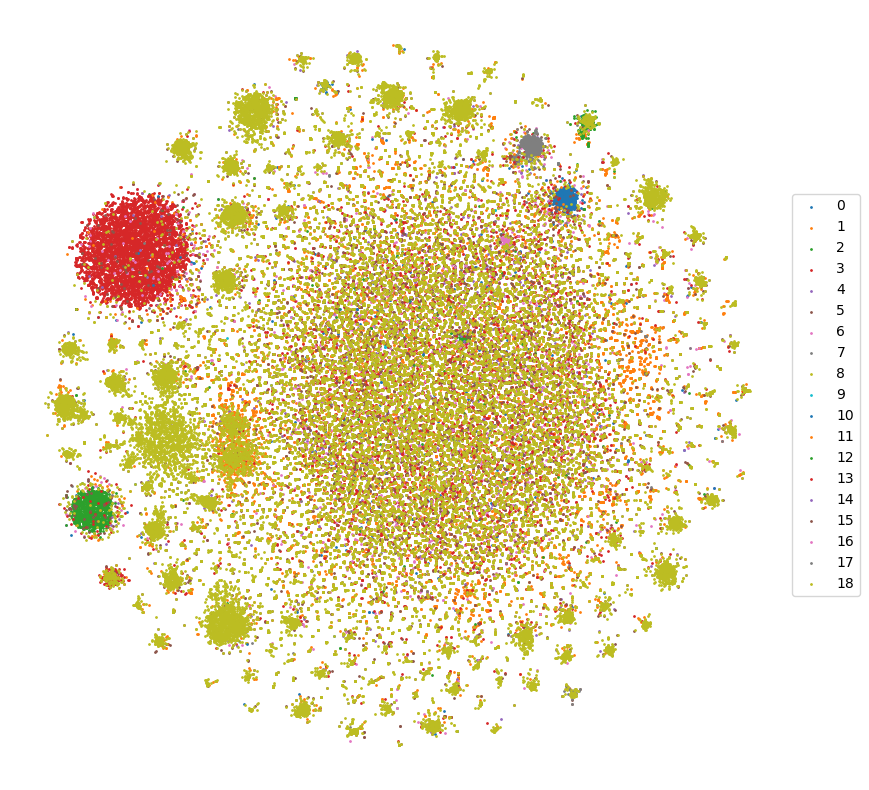

In [55]:
import matplotlib.pyplot as plt

# Assuming 'tsne_embeddings' are your t-SNE embeddings and 'train_data.edge_type' contains your edge types
unique_edge_types = set(train_data.edge_type.numpy())  # Convert to a set to get unique values

plt.figure(figsize=(10, 10))

# Plot each edge type with a different color and label
for edge_type in unique_edge_types:
    # Get indices of points for this edge type
    indices = [i for i, e in enumerate(train_data.edge_type) if e == edge_type]
    
    # Plot these points with a label
    plt.scatter(tsne_embeddings[indices, 0], tsne_embeddings[indices, 1], s=1, label=f'{edge_type}')

# Add legend outside of the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.axis('off')
plt.show()

In [18]:
# ind2node
ind2node = pickle.load(open('data/aida/ind2node_train.pkl', 'rb'))
len(ind2node)

98303

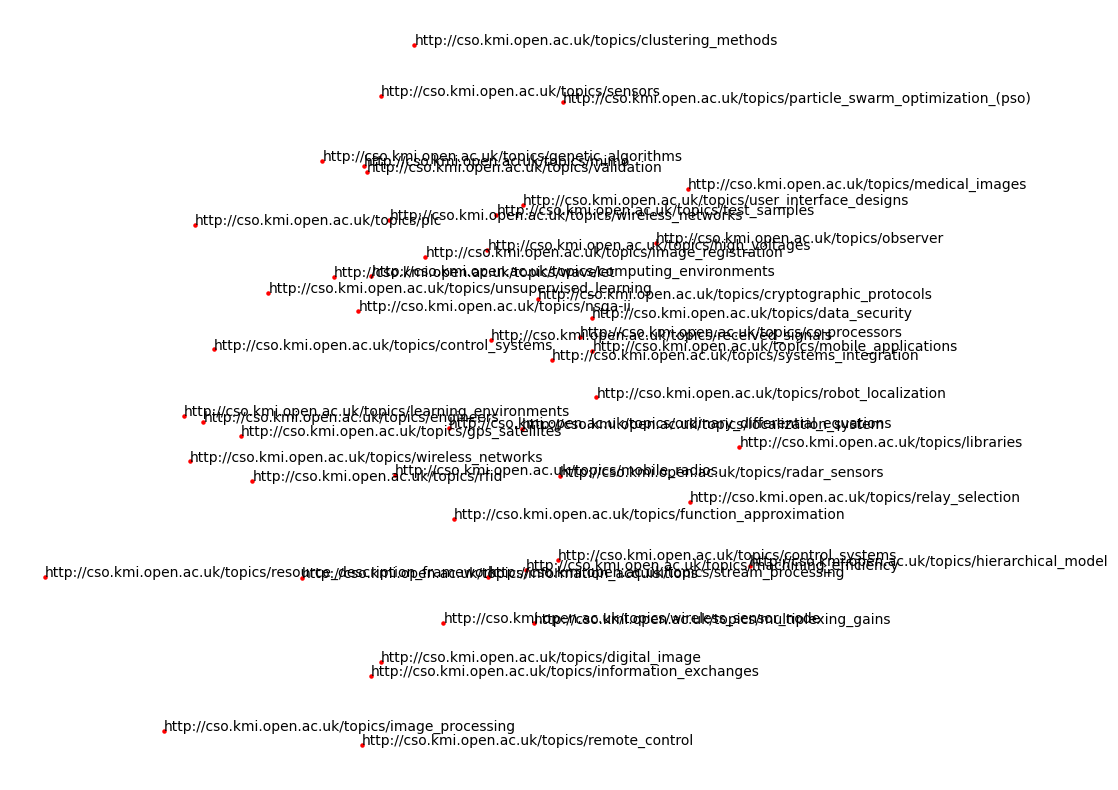

In [34]:
# plot only embeddings for edge type name
plt.figure(figsize=(10, 10))

# filter embeddings by edge type and choose first 50 samples
name_idx = np.where(train_data.edge_type == 1)[0]
name_idx = name_idx[:50]
name_embeddings = tsne_embeddings[name_idx]

plt.scatter(name_embeddings[:, 0], name_embeddings[:, 1], s=5, c='r')
plt.axis('off')

# label the points with the entity name using ind2node
for i in range(len(name_idx)):
    plt.annotate(ind2node[name_idx[i]], (name_embeddings[i, 0], name_embeddings[i, 1]))

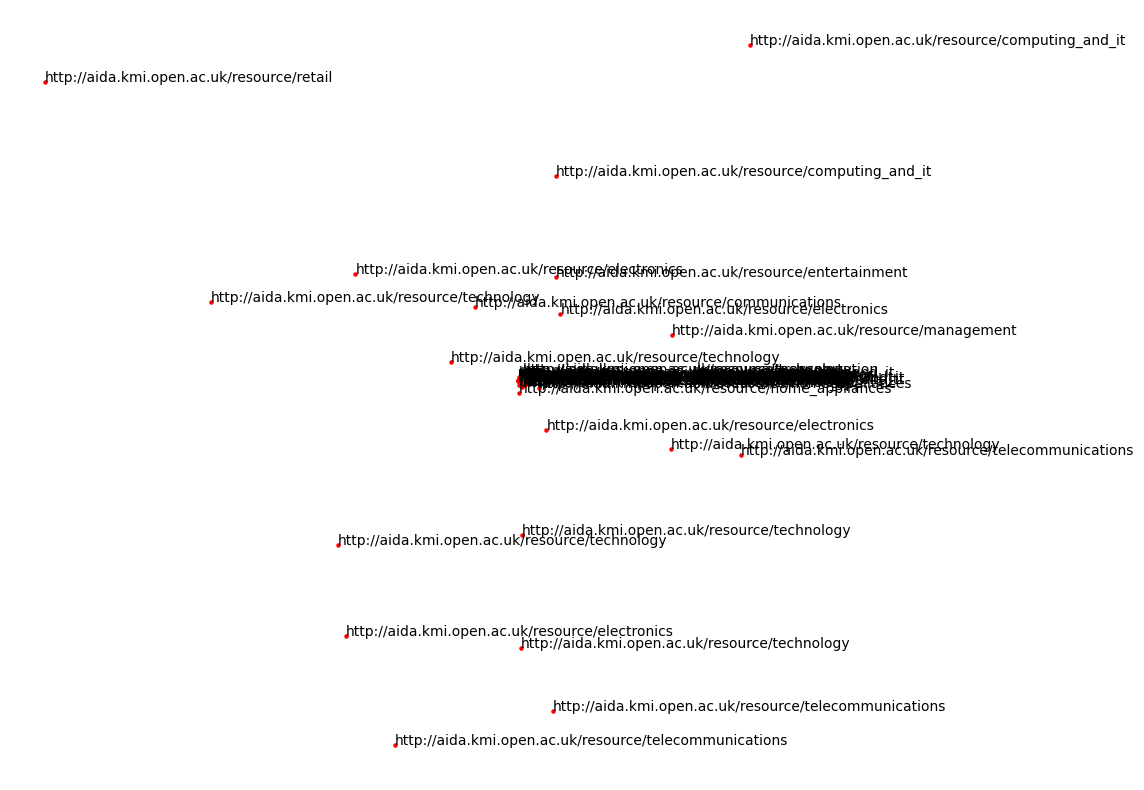

In [35]:
# plot only embeddings for edge type name
plt.figure(figsize=(10, 10))

# filter embeddings by edge type and choose first 50 samples
name_idx = np.where(train_data.edge_type == 2)[0]
name_idx = name_idx[:50]
name_embeddings = tsne_embeddings[name_idx]

plt.scatter(name_embeddings[:, 0], name_embeddings[:, 1], s=5, c='r')

plt.axis('off')

# label the points with the entity name using ind2node
for i in range(len(name_idx)):
    plt.annotate(ind2node[name_idx[i]], (name_embeddings[i, 0], name_embeddings[i, 1]))

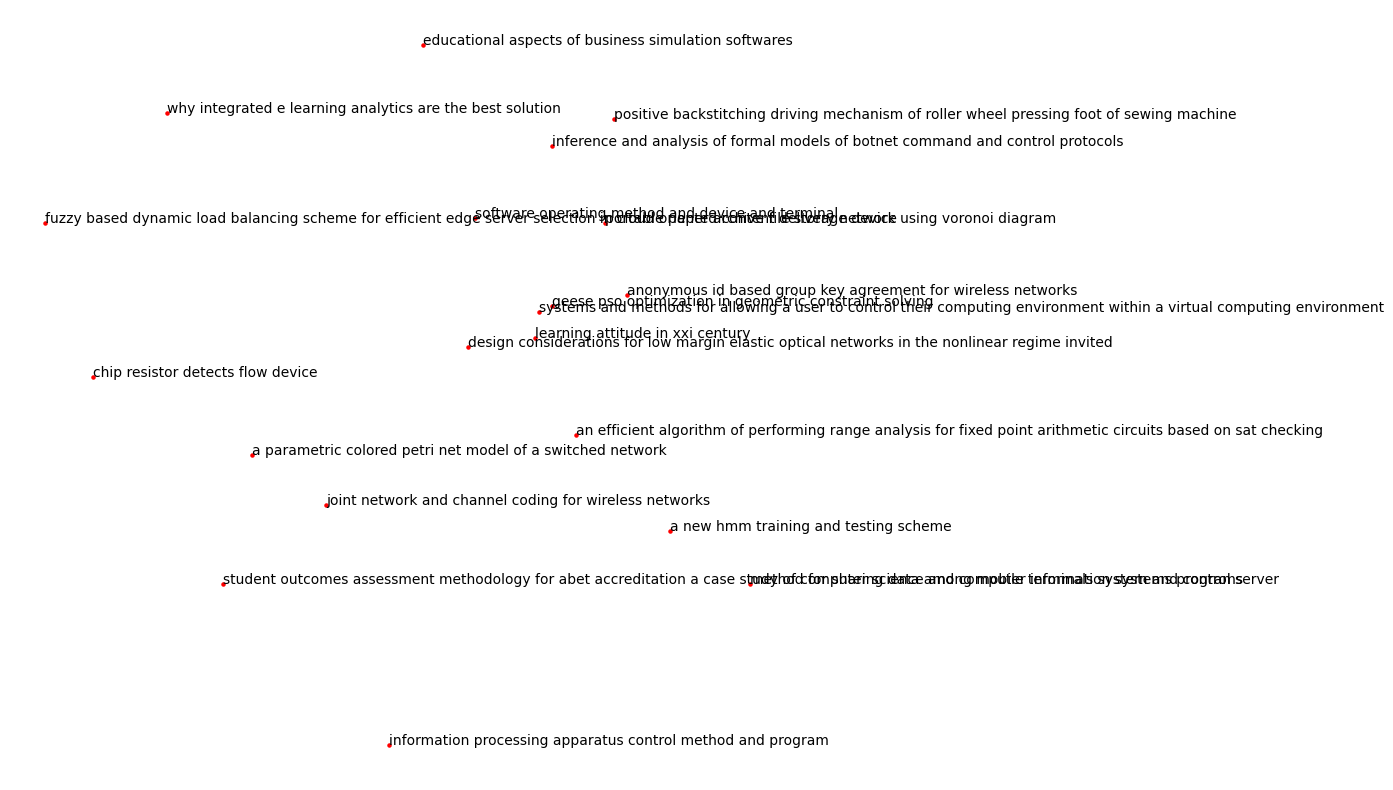

In [36]:
# plot only embeddings for edge type name
plt.figure(figsize=(10, 10))

# filter embeddings by edge type and choose first 20 samples
name_idx = np.where(train_data.edge_type == 4)[0]
name_idx = name_idx[:20]
name_embeddings = tsne_embeddings[name_idx]

plt.scatter(name_embeddings[:, 0], name_embeddings[:, 1], s=5, c='r')

plt.axis('off')

# label the points with the entity name using ind2node
for i in range(len(name_idx)):
    plt.annotate(ind2node[name_idx[i]], (name_embeddings[i, 0], name_embeddings[i, 1]))

/local/home/mamien/miniconda3/envs/science-clf-py3.9_torch/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 24278 (\N{CJK UNIFIED IDEOGRAPH-5ED6}) missing from current font.
  func(*args, **kwargs)
/local/home/mamien/miniconda3/envs/science-clf-py3.9_torch/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 20113 (\N{CJK UNIFIED IDEOGRAPH-4E91}) missing from current font.
  func(*args, **kwargs)
/local/home/mamien/miniconda3/envs/science-clf-py3.9_torch/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 27836 (\N{CJK UNIFIED IDEOGRAPH-6CBC}) missing from current font.
  func(*args, **kwargs)
/local/home/mamien/miniconda3/envs/science-clf-py3.9_torch/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 35029 (\N{CJK UNIFIED IDEOGRAPH-88D5}) missing from current font.
  func(*args, **kwargs)
/local/home/mamien/miniconda3/envs/science-clf-py3.9_torch/lib/python3.9/site-packages/IPython/core/events.p

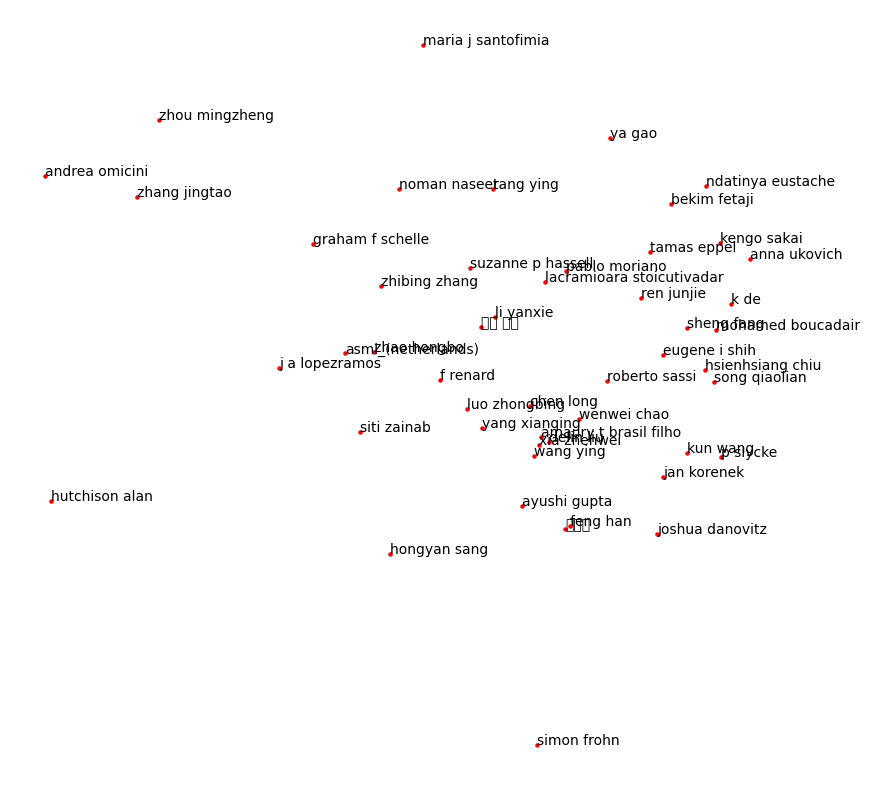

In [57]:
# plot only embeddings for edge type name
plt.figure(figsize=(10, 10))

# filter embeddings by edge type and choose first 50 samples
name_idx = np.where(train_data.edge_type == 6)[0]
name_idx = name_idx[:50]
name_embeddings = tsne_embeddings[name_idx]

plt.scatter(name_embeddings[:, 0], name_embeddings[:, 1], s=5, c='r')
plt.axis('off')

# label the points with the entity name using ind2node
for i in range(len(name_idx)):
    plt.annotate(ind2node[name_idx[i]], (name_embeddings[i, 0], name_embeddings[i, 1]))

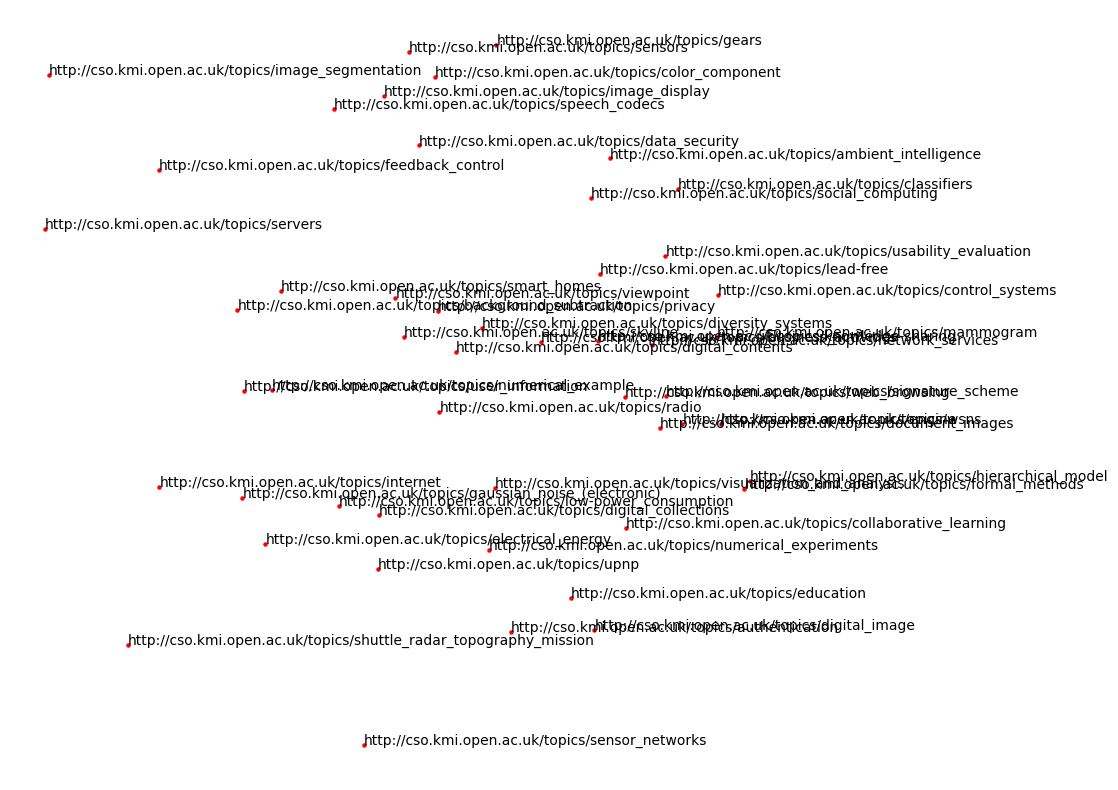

In [48]:
# plot only embeddings for edge type name
plt.figure(figsize=(10, 10))

# filter embeddings by edge type and choose first 50 samples
name_idx = np.where(train_data.edge_type == 11)[0]
name_idx = name_idx[:50]
name_embeddings = tsne_embeddings[name_idx]

plt.scatter(name_embeddings[:, 0], name_embeddings[:, 1], s=5, c='r')

plt.axis('off')

# label the points with the entity name using ind2node
for i in range(len(name_idx)):
    plt.annotate(ind2node[name_idx[i]], (name_embeddings[i, 0], name_embeddings[i, 1]))

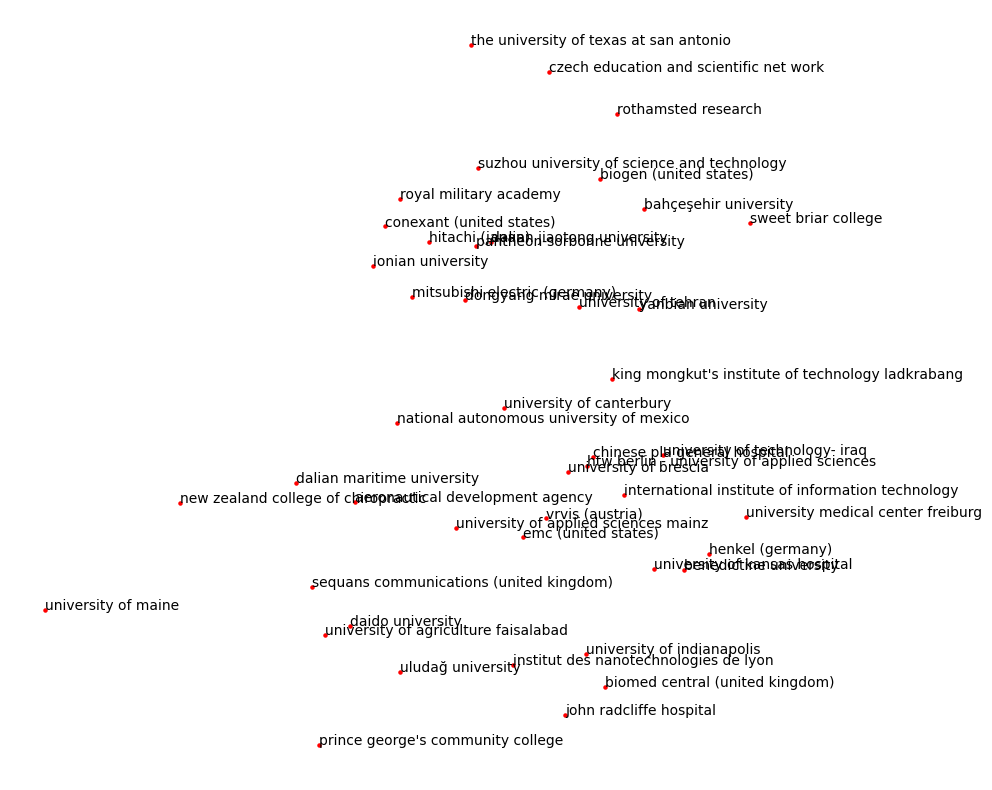

In [51]:
# plot only embeddings for edge type name
plt.figure(figsize=(10, 10))

# filter embeddings by edge type and choose first 50 samples
name_idx = np.where(train_data.edge_type == 14)[0]
name_idx = name_idx[:50]
name_embeddings = tsne_embeddings[name_idx]

plt.scatter(name_embeddings[:, 0], name_embeddings[:, 1], s=5, c='r')

plt.axis('off')

# label the points with the entity name using ind2node
for i in range(len(name_idx)):
    plt.annotate(ind2node[name_idx[i]], (name_embeddings[i, 0], name_embeddings[i, 1]))

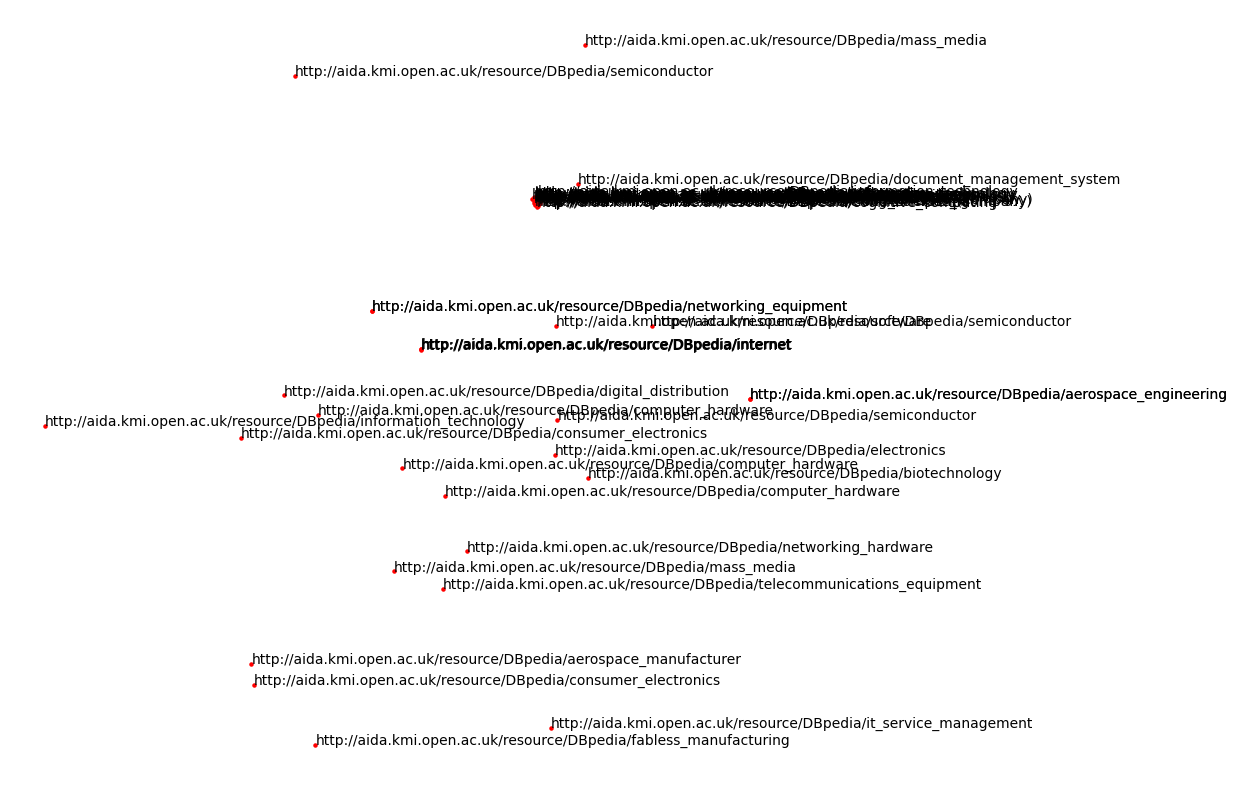

In [53]:
# plot only embeddings for edge type name
plt.figure(figsize=(10, 10))

# filter embeddings by edge type and choose first 50 samples
name_idx = np.where(train_data.edge_type == 16)[0]
name_idx = name_idx[:50]
name_embeddings = tsne_embeddings[name_idx]

plt.scatter(name_embeddings[:, 0], name_embeddings[:, 1], s=5, c='r')

plt.axis('off')

# label the points with the entity name using ind2node
for i in range(len(name_idx)):
    plt.annotate(ind2node[name_idx[i]], (name_embeddings[i, 0], name_embeddings[i, 1]))

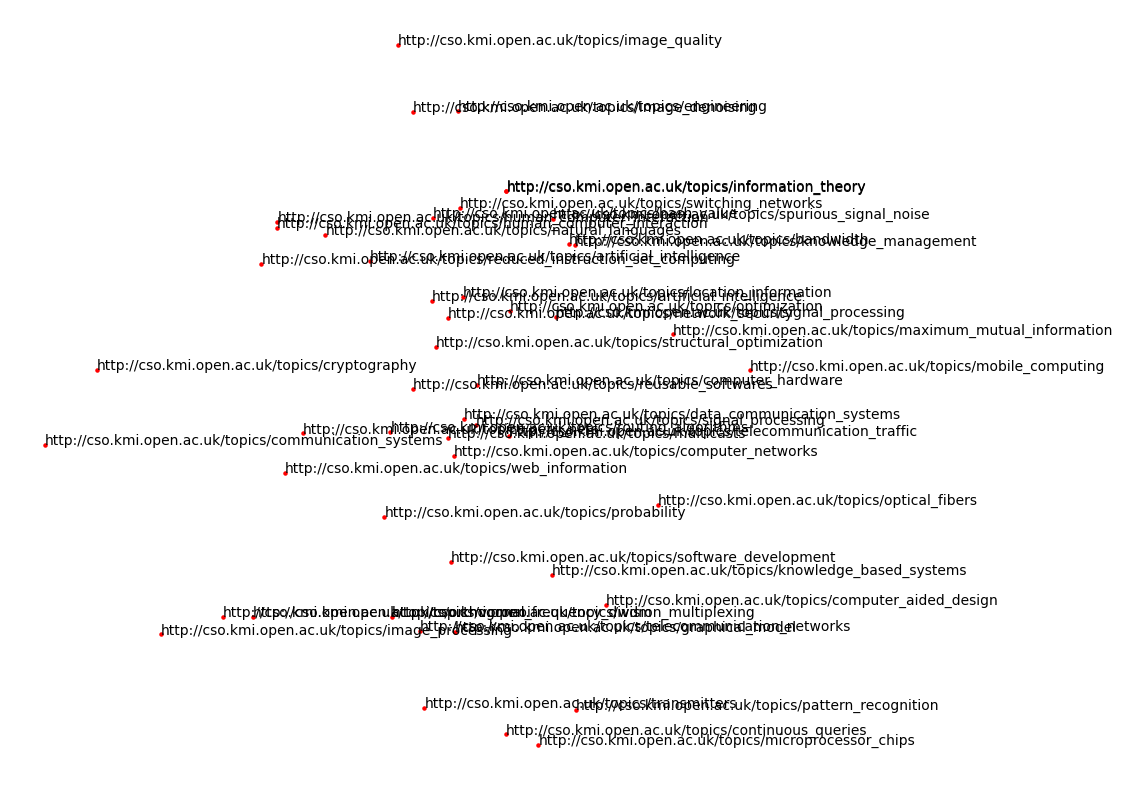

In [56]:
# plot only embeddings for edge type name
plt.figure(figsize=(10, 10))

# filter embeddings by edge type and choose first 50 samples
name_idx = np.where(train_data.edge_type == 18)[0]
name_idx = name_idx[:50]
name_embeddings = tsne_embeddings[name_idx]

plt.scatter(name_embeddings[:, 0], name_embeddings[:, 1], s=5, c='r')

plt.axis('off')

# label the points with the entity name using ind2node
for i in range(len(name_idx)):
    plt.annotate(ind2node[name_idx[i]], (name_embeddings[i, 0], name_embeddings[i, 1]))